In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Groceries_dataset.csv')

In [4]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
df.isnull().sum().sort_values(ascending = False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [10]:
df['date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 1.2+ MB


In [11]:
df.head()

,Member_number,Date,itemDescription,date
0,1808,2015-07-21,tropical fruit,2015-07-21
1,2552,2015-05-01,whole milk,2015-05-01
2,2300,2015-09-19,pip fruit,2015-09-19
3,1187,2015-12-12,other vegetables,2015-12-12
4,3037,2015-01-02,whole milk,2015-01-02


In [20]:
Item_distr = df.groupby('itemDescription').size().reset_index(name = 'Frequency').sort_values('Frequency', ascending=False).head(10)
Item_distr

,itemDescription,Frequency
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334
123,root vegetables,1071
156,tropical fruit,1032
12,bottled water,933
130,sausage,924
30,citrus fruit,812


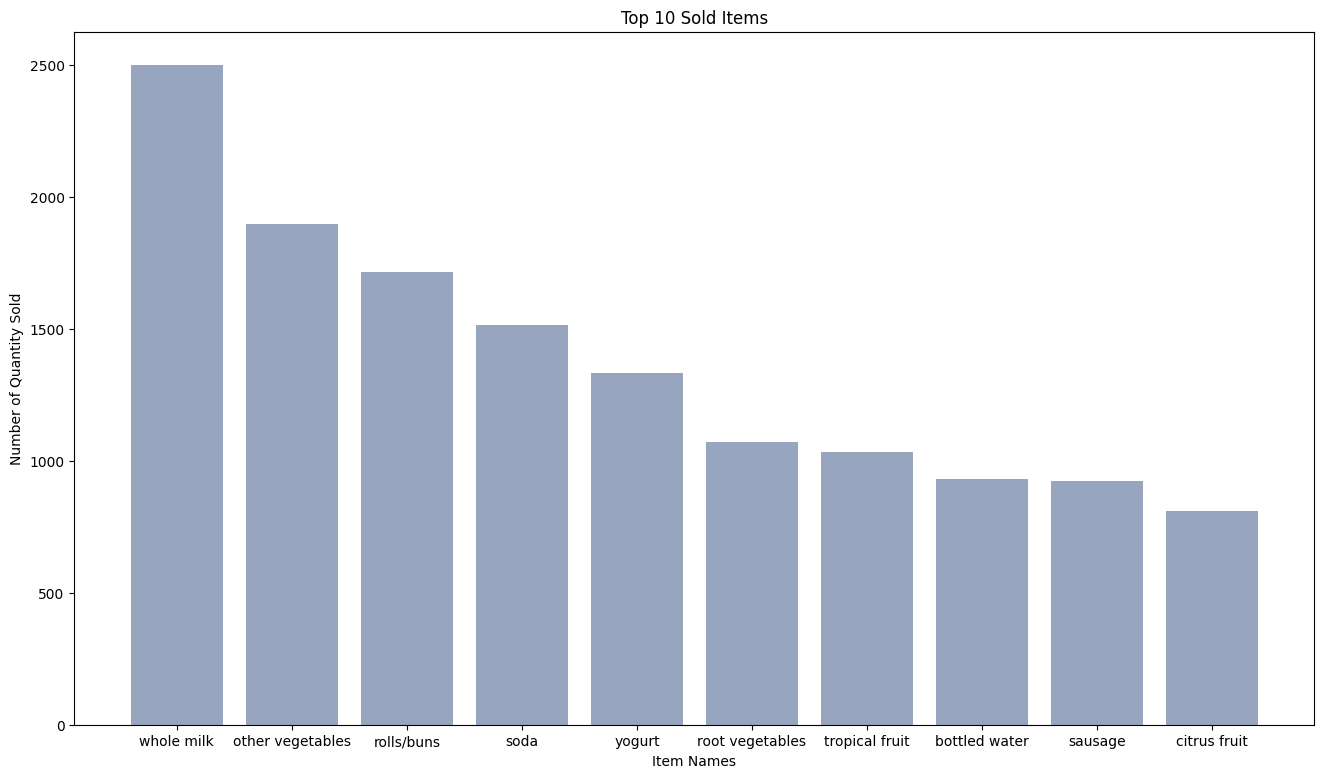

In [21]:
bars = Item_distr['itemDescription']
height = Item_distr['Frequency']
x_pos = np.arange(len(bars))

plt.figure(figsize=(16,9))

plt.bar(x_pos, height, color=(0.2,0.3,0.5,0.5))

plt.title('Top 10 Sold Items')
plt.xlabel('Item Names')
plt.ylabel('Number of Quantity Sold')

plt.xticks(x_pos, bars)
plt.show()

In [22]:
df_date = df.set_index(['Date'])
df_date

,Member_number,itemDescription,date
Date,,,
2015-07-21,1808,tropical fruit,2015-07-21
2015-05-01,2552,whole milk,2015-05-01
2015-09-19,2300,pip fruit,2015-09-19
2015-12-12,1187,other vegetables,2015-12-12
2015-01-02,3037,whole milk,2015-01-02
...,...,...,...
2014-08-10,4471,sliced cheese,2014-08-10
2014-02-23,2022,candy,2014-02-23
2014-04-16,1097,cake bar,2014-04-16


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

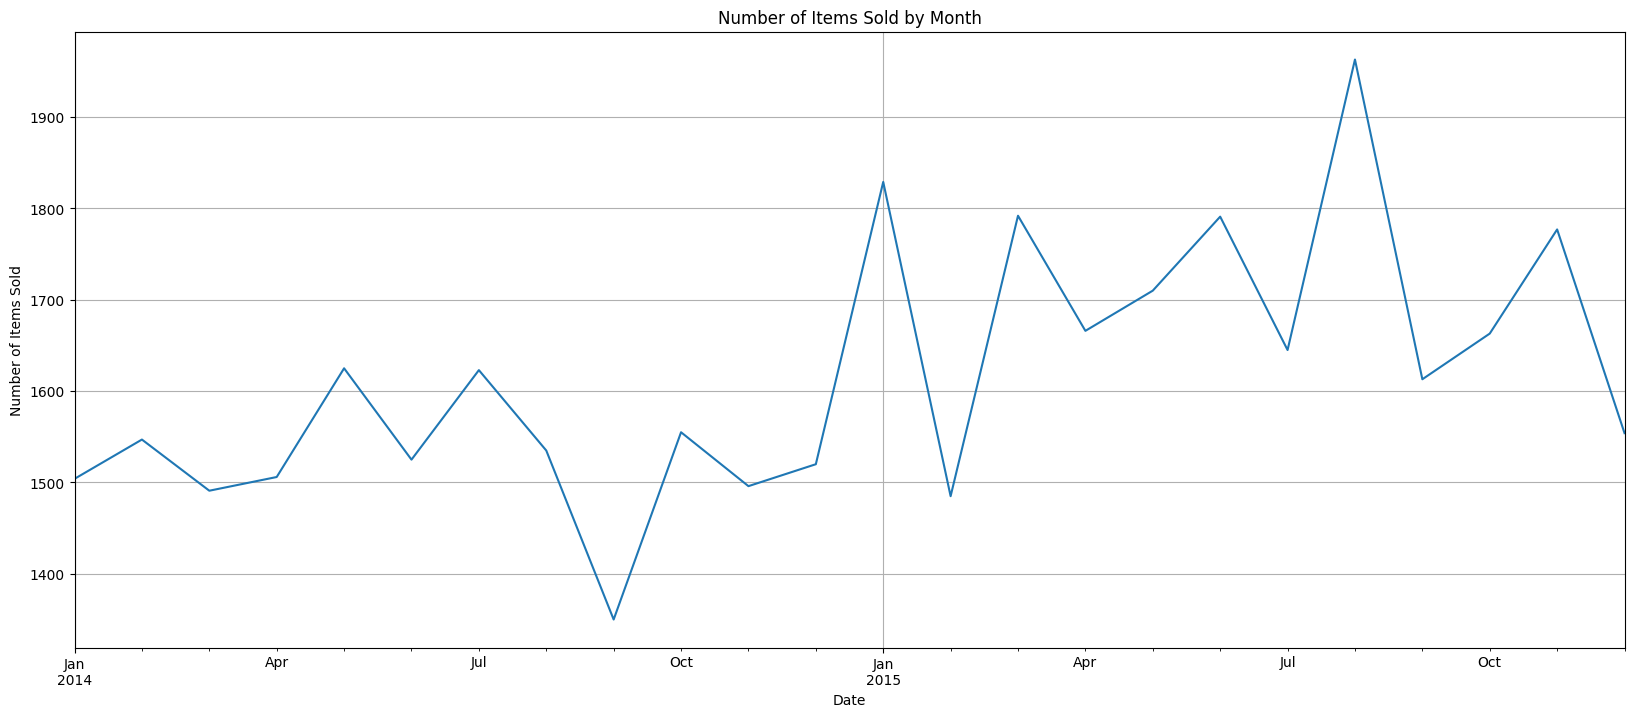

In [24]:
df_date.resample('M')['itemDescription'].count().plot(figsize=(20,8), grid=True, title='Number of Items Sold by Month').set(xlabel='Date', ylabel='Number of Items Sold')

In [25]:
cust_level = df[['Member_number','itemDescription']].sort_values('Member_number',ascending=False)
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [27]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))]
transactions

[['misc. beverages',
  'sausage',
  'soda',
  'yogurt',
  'salty snack',
  'pastry',
  'canned beer',
  'hygiene articles',
  'whole milk',
  'pickled vegetables',
  'sausage',
  'semi-finished bread',
  'whole milk'],
 ['beef',
  'sausage',
  'frankfurter',
  'soda',
  'whipped/sour cream',
  'frankfurter',
  'rolls/buns',
  'soda',
  'white bread',
  'whole milk',
  'whole milk',
  'curd'],
 ['specialty chocolate',
  'butter',
  'whole milk',
  'butter milk',
  'tropical fruit',
  'sugar',
  'other vegetables',
  'frozen vegetables'],
 ['dental care',
  'rolls/buns',
  'rolls/buns',
  'frozen meals',
  'rolls/buns',
  'sausage',
  'detergent',
  'root vegetables'],
 ['frozen fish',
  'shopping bags',
  'hygiene articles',
  'rolls/buns',
  'whole milk',
  'canned beer',
  'root vegetables',
  'tropical fruit',
  'whole milk',
  'chocolate',
  'other vegetables',
  'red/blush wine',
  'pastry',
  'rolls/buns',
  'packaged fruit/vegetables',
  'dish cleaner',
  'pip fruit',
  'other ve

In [31]:
!pip install apyori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=f9ca67b36ad481e2d3c516f2e414f35ddde3c18e5615c5bdc7ad55ac6c1d663e
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [32]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support=0.002, min_confidence=0.05, min_lift=3, min_length=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
results = list(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'meat spreads', 'domestic eggs'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [40]:
def inspect(results):
  lhs = [tuple(result[2][0][0])[0] for result in results]
  rhs = [tuple(result[2][0][1])[0] for result in results]
  supports = [result[1] for result in results]
  confidences = [result[2][0][2] for result in results]
  lifts = [result[2][0][3] for result in results]
  return list(zip(lhs, rhs, supports, confidences, lifts))
final_result = pd.DataFrame(inspect(results),columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
final_result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,kitchen towels,UHT-milk,0.002309,0.300000,3.821569
1,potato products,beef,0.002565,0.454545,3.802185
2,canned fruit,coffee,0.002309,0.428571,3.728954
3,meat spreads,domestic eggs,0.003592,0.400000,3.004239
4,flour,mayonnaise,0.002309,0.063380,3.338599
...,...,...,...,...,...
5341,sausage,whole milk,0.002565,0.052083,5.800595
5342,other vegetables,sausage,0.002309,0.062937,3.661622
5343,other vegetables,sausage,0.002052,0.079208,4.608246
5344,bottled water,sausage,0.002052,0.087912,5.114647


In [47]:
final_result.nlargest(n=10, columns='Confidence')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Left Hand Side,Right Hand Side,Support,Confidence,Lift
315,waffles,yogurt,0.003592,0.933333,3.298398
613,berries,yogurt,0.002822,0.916667,3.239498
303,packaged fruit/vegetables,root vegetables,0.002309,0.818182,3.547578
4764,pork,other vegetables,0.002052,0.800000,4.180161
310,shopping bags,root vegetables,0.002052,0.727273,3.153403
961,other vegetables,bottled water,0.002052,0.727273,3.403252
1017,specialty chocolate,bottled water,0.002052,0.727273,3.403252
1521,oil,other vegetables,0.002052,0.727273,3.800146
2308,root vegetables,sausage,0.002052,0.727273,3.530397
3392,hamburger meat,other vegetables,0.002052,0.727273,3.800146
